In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from numpy.linalg import inv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
allData = pd.read_csv('Admission_Predict.csv')

In [13]:
#Renaming some columns so they're easier to reference later
allData.columns = ['SN', 'GRE', 'TOEFL', 'UR', 'SOP', 'LOR', 'CGPA', 'R', 'COA']

#We don't need serial number
allData = allData.drop(['SN'],axis=1)

In [14]:
#Splitting the data into a training and testing datasets
y = allData['COA']
X = allData.drop(['COA'], axis=1)
XTr, XTe, yTr, yTe = train_test_split(X,y, test_size = 0.33)

In [15]:
#Linear regression function
class MyLinearRegression():
    
    def fit(self, X, Y):
        self.X_ = X
        self.Y_ = Y
        XT = np.transpose(self.X_)
        XTX = np.dot(XT, self.X_)
        XTY = np.dot(XT, self.Y_)
        self.beta = np.dot(inv(XTX),XTY)
        return self
    
    def predict(self, X):
        prediction = np.dot(X, self.beta)
        return prediction

In [16]:
#Compute the predicted values of the 
LR = MyLinearRegression()
LR_Fit = LR.fit(XTr, yTr)
predicted_chance = LR_Fit.predict(XTe)
    

In [17]:
#Need to round GPA to the nearest second decimal place.
predicted_chance = np.around(predicted_chance, decimals = 2)

In [18]:
print("The mean absolute error is, ",mean_absolute_error(yTe, predicted_chance))

The mean absolute error is,  0.05492424242424242


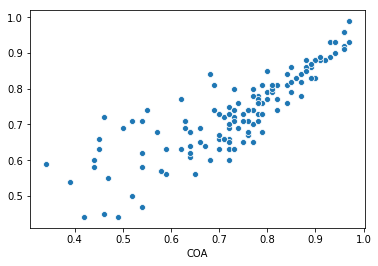

In [19]:
#Scatter plot which maps the predicted and actual values. We should see positive linear trend.
sns.scatterplot(x = yTe, y = predicted_chance)

In [20]:
#Let's compare how well sklearn's linear regression compares to the one that we have developed here
skLearnRegr = LinearRegression()
skLearnRegrFit = skLearnRegr.fit(XTr, yTr)
skLearnRegrPredict = skLearnRegrFit.predict(XTe)
skLearnRegrPredict = np.around(skLearnRegrPredict, decimals = 2)

print("The mean absolute error is, ",mean_absolute_error(yTe, predicted_chance))

#Great results!

The mean absolute error is,  0.05492424242424242
